# Titanic: Machine Learning from Disaster

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

## Objective

Predict what sorts of people were likely to survive.

Inspiration:
   - https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
   - https://www.kaggle.com/poonaml/titanic/titanic-survival-prediction-end-to-end-ml-pipeline
   - https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial
   - https://www.kaggle.com/arthurlu/titanic/exploratory-tutorial-titanic

## Table of contents

- [First look at the data](#First-look-at-the-data)
    - [Import Libraries](#Import-Libraries)
    - [Load Data](#Load-Data)
    - [Brief summaries](#Brief-summaries)
- [Visualization](#Visualization)
    - [Getting a better basic understanding of the data](#Getting-a-better-basic-understanding-of-the-data)
    - [Studying features relationship whith the Target feature : Survived](#Studying-features-relationship-whith-the-Target-feature-:-Survived)
- [Missing Values](#Missing-Values)
- [Feature enginering](#Feature-enginering)
- [Feature Scalling](#Feature-Scalling)
- [Feature Selection](#Feature-selection)
- [Feature enginering](#Feature-enginering)
    

Importing a DataFrame
Visualize the Data
Cleanup and Transform the Data
Encode the Data
Split Training and Test Sets
Fine Tune Algorithms
Cross Validate with KFold
Upload to Kaggle

## First look at the data

### Import Libraries

In [265]:
# Dataframe
import pandas as pd

# Visualization
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning
import sklearn as sk

### Load data

In [266]:
# Load data directly into a dataframe
df_train=pd.read_csv("Data/Titanic/train.csv")
df_test=pd.read_csv("Data/Titanic/test.csv")

# Get a look at the first rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Description
    - Survived: Survived (1) or died (0)
    - Pclass: Passenger's class
    - Name: Passenger's name
    - Sex: Passenger's sex
    - Age: Passenger's age
    - SibSp: Number of siblings/spouses aboard
    - Parch: Number of parents/children aboard
    - Ticket: Ticket number
    - Fare: Fare
    - Cabin: Cabin
    - Embarked: Port of embarkation
    
    Source of information : https://www.kaggle.com/c/titanic/data

### Brief summaries

In [267]:
print("----------------------------------Informations for the training set----------------------------------\n")
df_train.info()
print('\n',df_train.isnull().sum())
print("\n----------------------------------Informations for the testing set ----------------------------------\n")
df_test.info()
print('\n',df_test.isnull().sum())

----------------------------------Informations for the training set----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----------------------------------Informations for the testing set -

Note that:
    - No Survived feature on the testing set
    - Cabin feature is mostly null --> Will be dropped
    - Embarked feature has a few missing values
    - Some Ages are missing --> Will need to be completed or drop the missing rows
    - Survived and Pclass should be treated as object because they are qualitative

In [268]:
# Dropping Cabin, Ticket and PassengerId
df_train=df_train.drop(['Cabin','PassengerId','Ticket'], axis=1)

df_test=df_test.drop(['Cabin','Ticket'], axis=1)

In [269]:
# Changing the type of Pclass and Survived 
df_train['Pclass']=df_train['Pclass'].astype(object)
df_train['Survived']=df_train['Survived'].astype(object)

df_test['Pclass']=df_test['Pclass'].astype(object)

In [270]:
# Basic statistical information about quantitative and qualitative columns

print("----------------------------------Informations for the training set----------------------------------\n")
# Quantitative
display(df_train.describe())
# Qualitative
display(df_train.describe(include=['object']))
print("----------------------------------Informations for the testing set----------------------------------\n")
# Quantitative
display(df_test.describe())
# Qualitative
display(df_test.describe(include=['object']))

----------------------------------Informations for the training set----------------------------------



,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


,Survived,Pclass,Name,Sex,Embarked
count,891,891,891,891,889
unique,2,3,891,2,3
top,0,3,"Harper, Mr. Henry Sleeper",male,S
freq,549,491,1,577,644


----------------------------------Informations for the testing set----------------------------------



,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188
std,120.810458,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


,Pclass,Name,Sex,Embarked
count,418,418,418,418
unique,3,418,2,3
top,3,"Brady, Mr. John Bertram",male,S
freq,218,1,266,270


###  Visualization

#### Getting a better basic understanding of the data

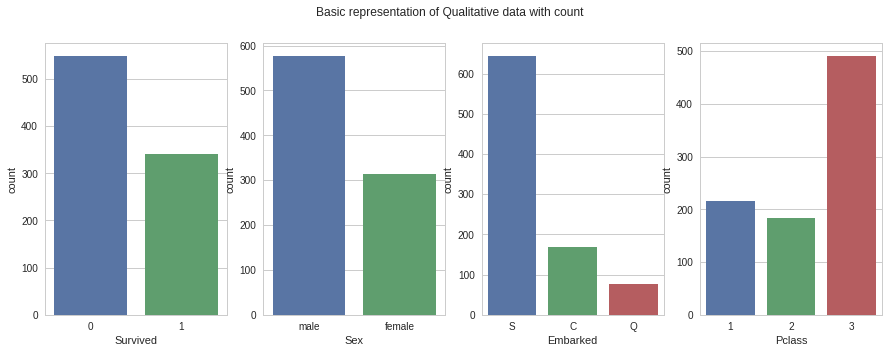

In [271]:
# Qualitative Data
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x='Survived', data=df_train, ax=axis1)
sns.countplot(x='Sex', data=df_train, ax=axis2)
sns.countplot(x='Embarked', data=df_train, ax=axis3)
sns.countplot(x='Pclass', data=df_train, ax=axis4)
fig.suptitle("Basic representation of Qualitative data with count")

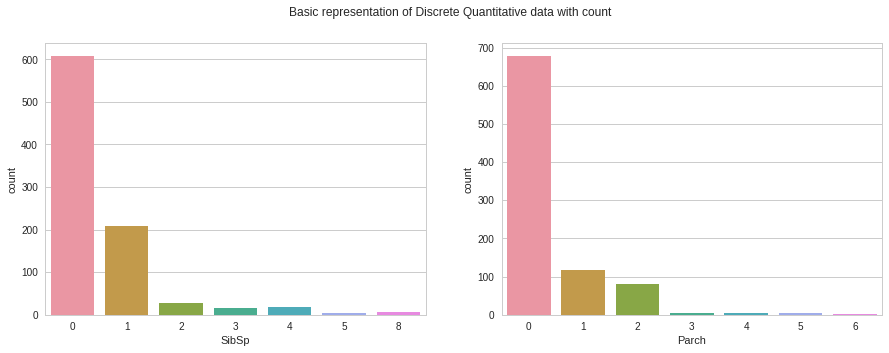

In [272]:
# Discrete Quantitative Data
fig2, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_train['SibSp'],ax=axis1)
sns.countplot(df_train['Parch'],ax=axis2)
fig2.suptitle("Basic representation of Discrete Quantitative data with count")

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


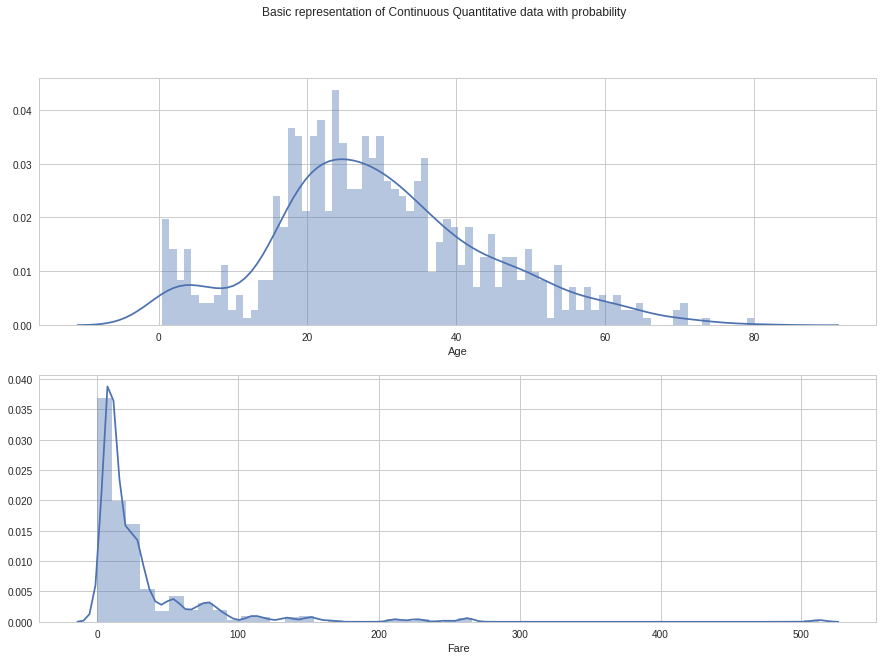

In [273]:
# Continuous Quantitative Data
fig3, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))
sns.distplot(df_train['Age'].dropna(), bins=80, ax=axis1)
sns.distplot(df_train['Fare'], ax=axis2)
fig3.suptitle("Basic representation of Continuous Quantitative data with probability")

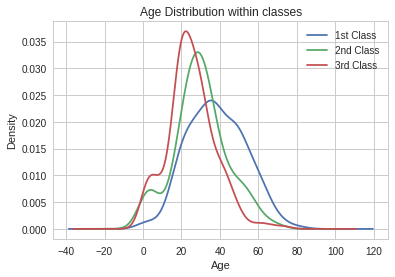

In [274]:
# Age distribution within classes
df_train.Age[df_train.Pclass == 1].plot(kind='kde')    
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

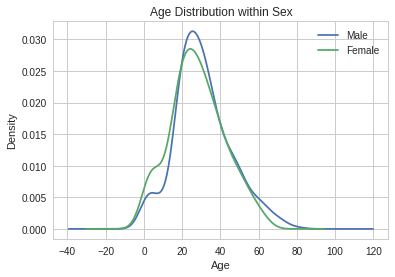

In [275]:
# Age distribution within sex
df_train.Age[df_train.Sex == 'male'].plot(kind='kde')    
df_train.Age[df_train.Sex == 'female'].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within Sex")
# sets our legend for our graph.
plt.legend(('Male', 'Female'),loc='best')

#### Studying features relationship whith the Target feature : Survived

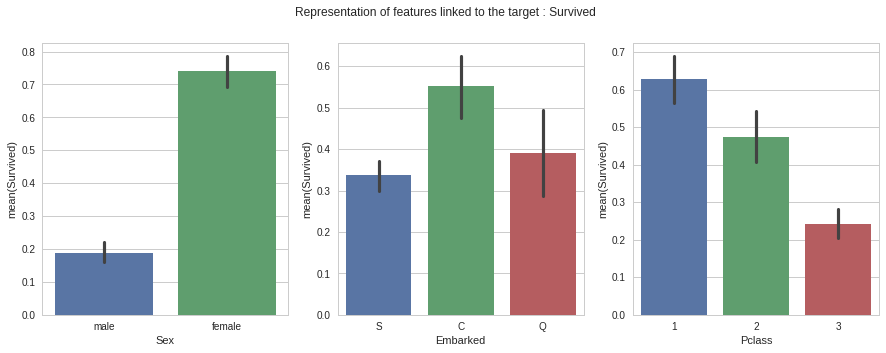

In [276]:
# Quick view of Sex, Pclass & Embarked
fig4, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Sex',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Embarked',y='Survived', data=df_train, ax=axis2)
sns.barplot(x='Pclass',y='Survived', data=df_train, ax=axis3)
fig4.suptitle("Representation of features linked to the target : Survived ")

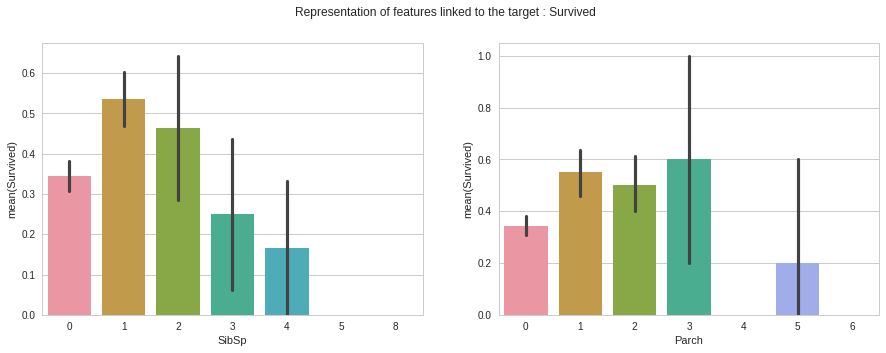

In [277]:
# Quick view of SibSp & Parch
fig6, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='SibSp',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Parch',y='Survived', data=df_train, ax=axis2)
fig6.suptitle("Representation of features linked to the target : Survived ")

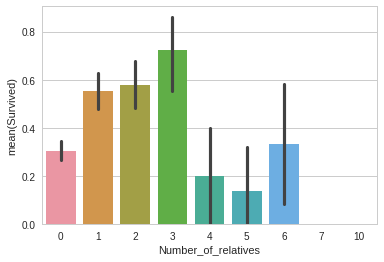

In [421]:
# Creation of a feature Number_of_relatives = SibSp + Parch and quick view
df_train['Number_of_relatives']=df_train['SibSp']+df_train['Parch']
df_test['Number_of_relatives']=df_test['SibSp']+df_train['Parch']
sns.barplot(x='Number_of_relatives',y='Survived', data=df_train)

We can create 3 categories : 
    - Alone = 0
    - Small = [1,2,3]
    - Big = > 3

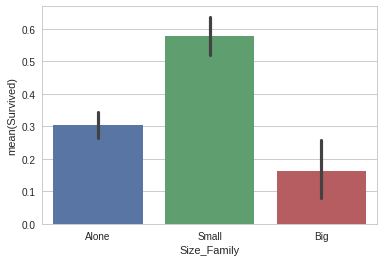

In [422]:
# Creation of a categorical feature Size_Family
df_train.loc[df_train['Number_of_relatives'] == 0, 'Size_Family'] = 'Alone'
df_train.loc[ (df_train['Number_of_relatives'] > 0) 
            & (df_train['Number_of_relatives'] < 4), 'Size_Family'] = 'Small'
df_train.loc[df_train['Number_of_relatives'] > 3, 'Size_Family'] = 'Big'

df_test.loc[df_test['Number_of_relatives'] == 0, 'Size_Family'] = 'Alone'
df_test.loc[ (df_test['Number_of_relatives'] > 0) 
            & (df_test['Number_of_relatives'] < 4), 'Size_Family'] = 'Small'
df_test.loc[df_test['Number_of_relatives'] > 3, 'Size_Family'] = 'Big'

sns.barplot(x='Size_Family',y='Survived', data=df_train, order=['Alone', 'Small', 'Big'])

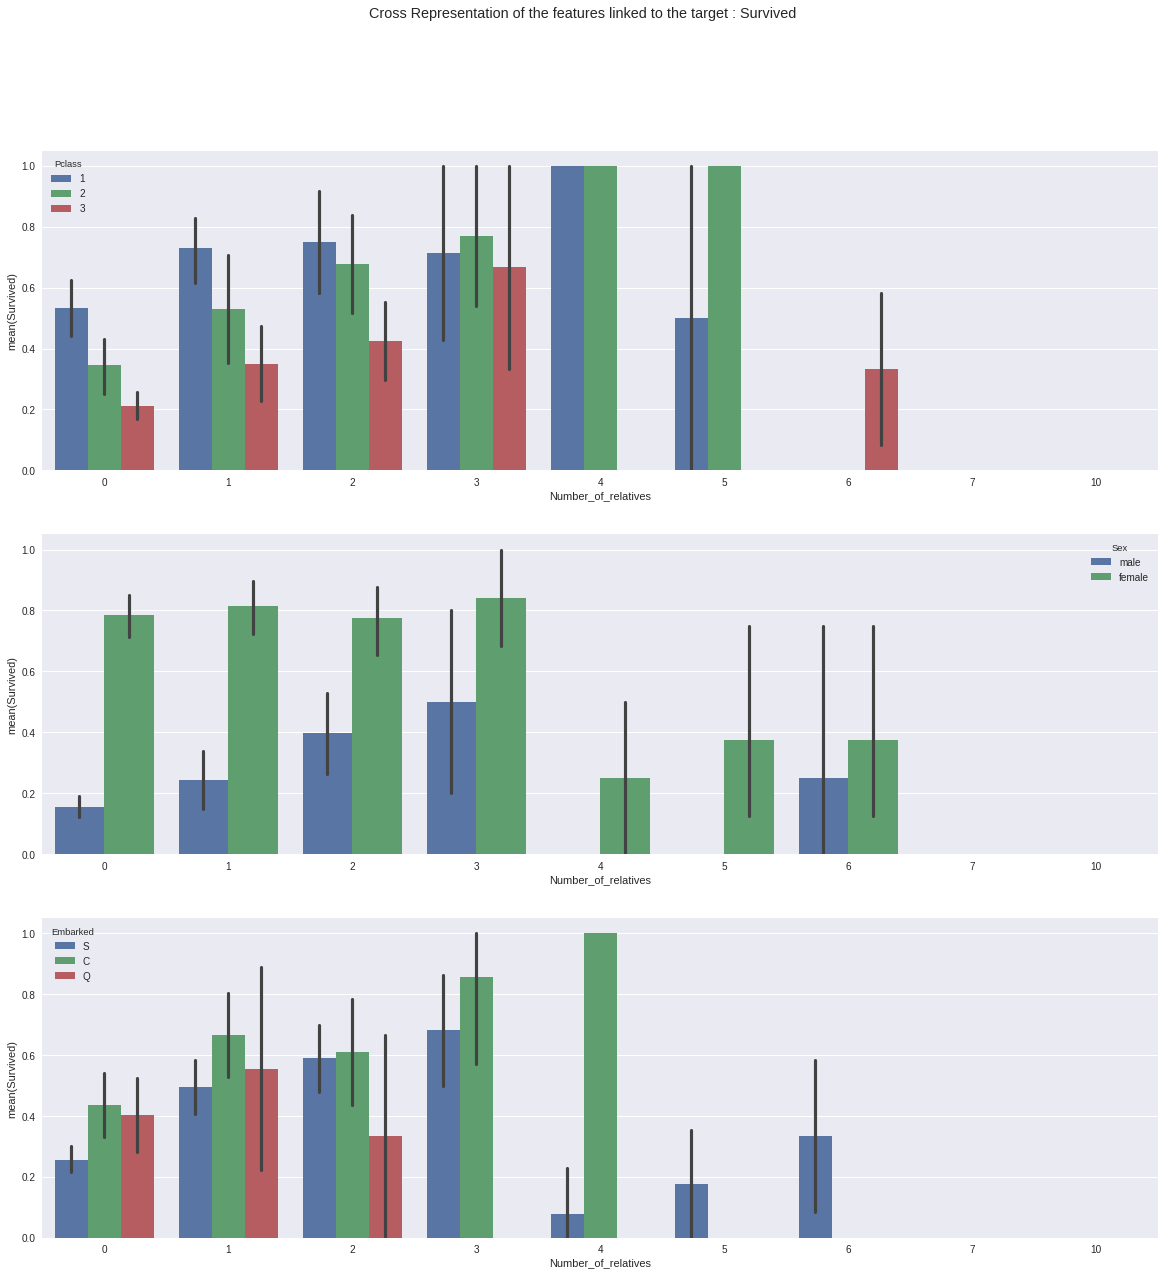

In [152]:
# Study of Number_of_relatives
fig7, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Number_of_relatives',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Sex', data=df_train, ax=axis2)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Embarked', data=df_train, ax=axis3)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

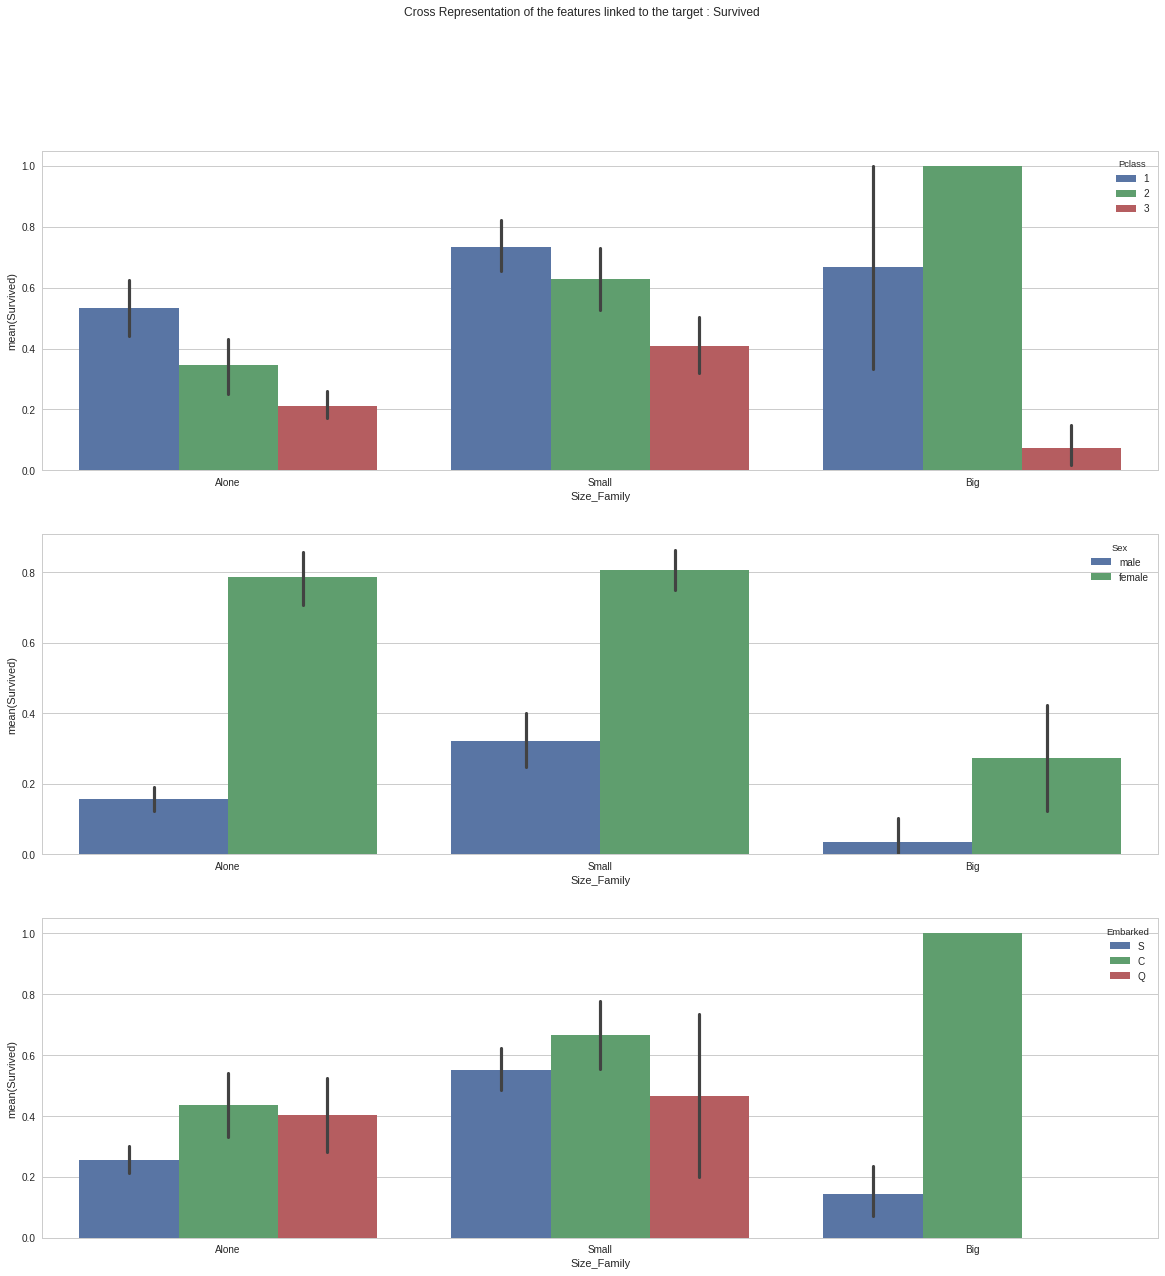

In [290]:
# Study of Size_Family
fig7, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Size_Family',y='Survived',hue='Pclass', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis1,)
sns.barplot(x='Size_Family',y='Survived',hue='Sex', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis2)
sns.barplot(x='Size_Family',y='Survived',hue='Embarked', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis3)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

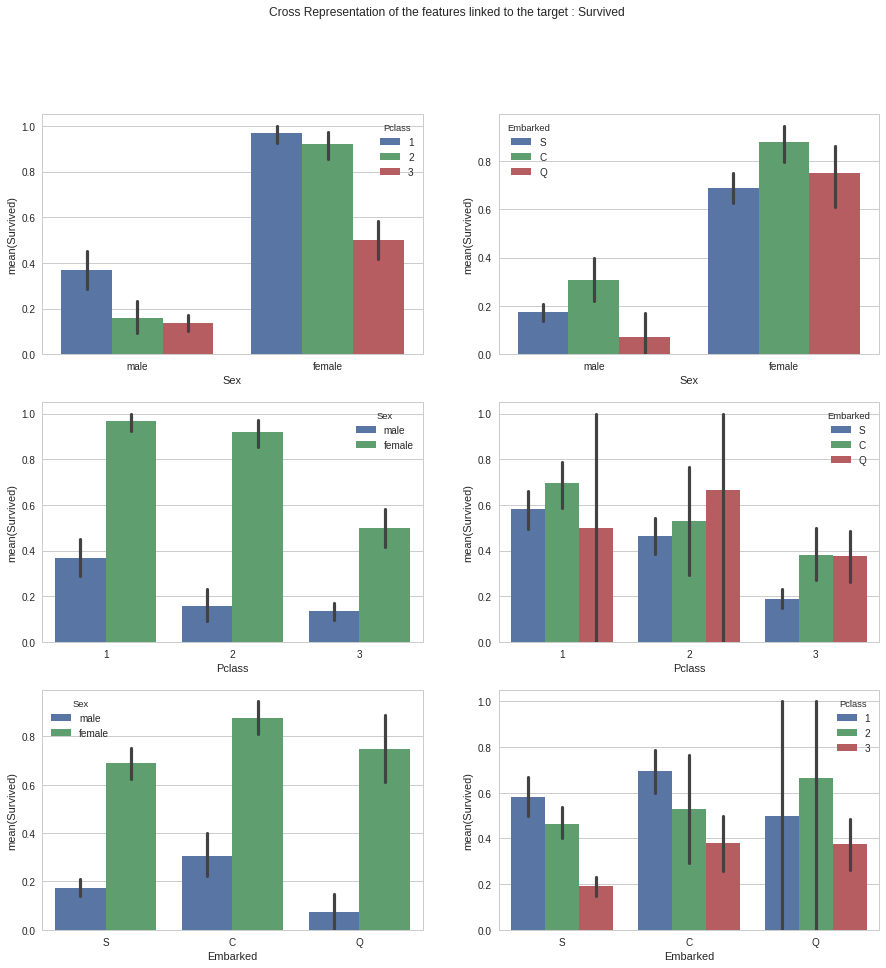

In [291]:
# Study of Sex, Pclass, Embarked
fig5, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(15,15))
sns.barplot(x='Sex',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Sex',y='Survived',hue='Embarked', data=df_train, ax=axis2)

sns.barplot(x='Pclass',y='Survived',hue='Sex', data=df_train, ax=axis3)
sns.barplot(x='Pclass',y='Survived',hue='Embarked', data=df_train, ax=axis4)

sns.barplot(x='Embarked',y='Survived',hue='Sex', data=df_train, ax=axis5)
sns.barplot(x='Embarked',y='Survived',hue='Pclass', data=df_train, ax=axis6)

fig5.suptitle("Cross Representation of the features linked to the target : Survived")

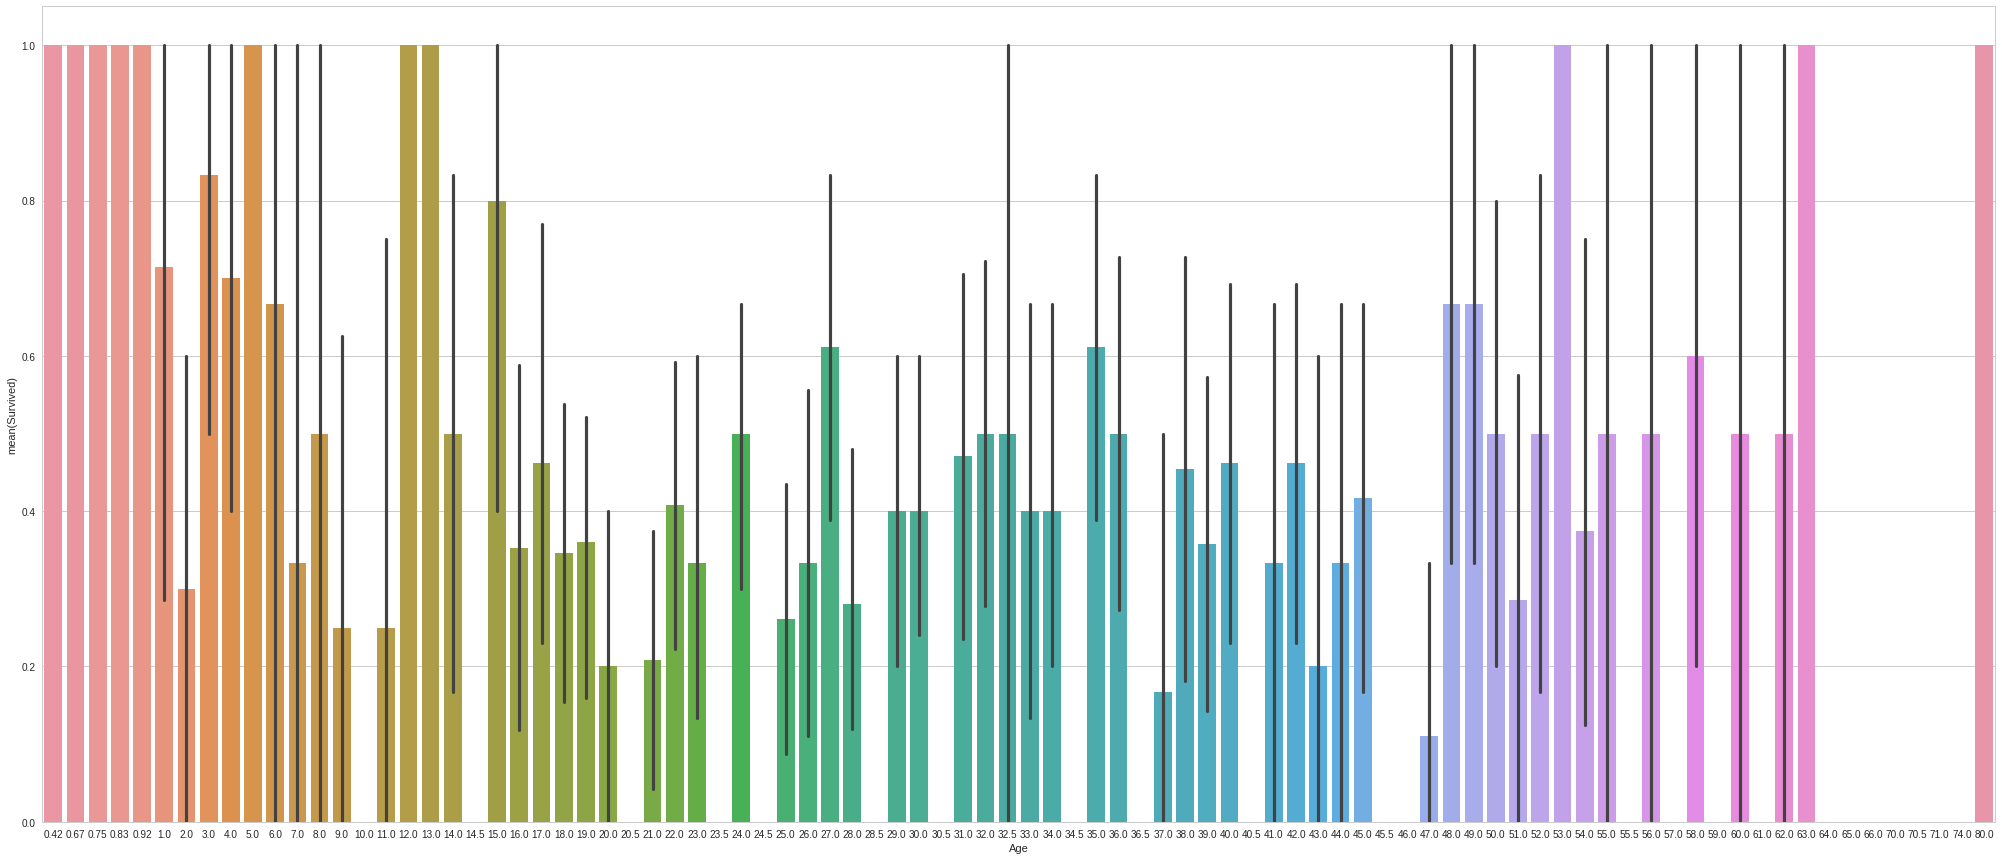

In [403]:
# Study of Age
fig = plt.figure(figsize=(35, 15))
fig=sns.barplot(x='Age', y='Survived', data=df_train)

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


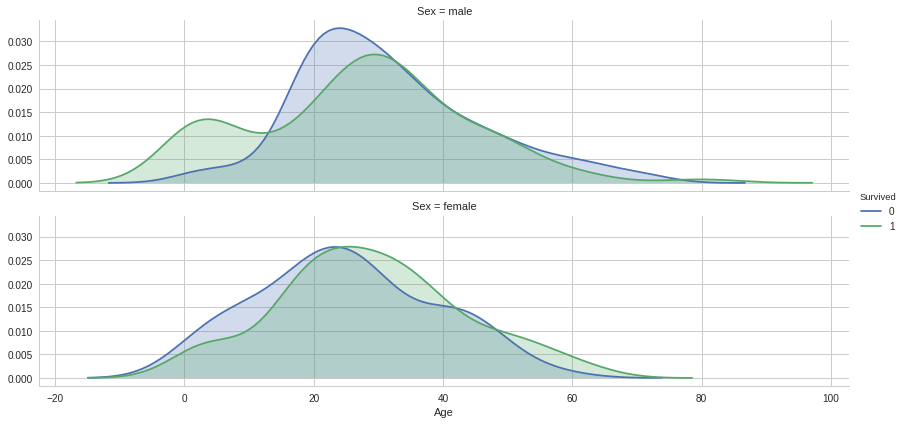

In [363]:
# Study of Age & Sex
g = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Sex')
g.map( sns.kdeplot , 'Age' , shade= True )
g.add_legend()

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


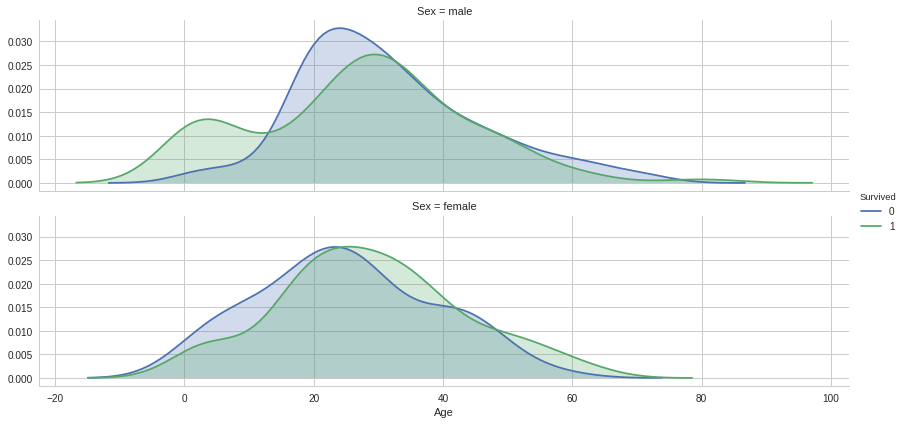

In [363]:
# Study of Age & Sex
g = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Sex')
g.map( sns.kdeplot , 'Age' , shade= True )
g.add_legend()

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


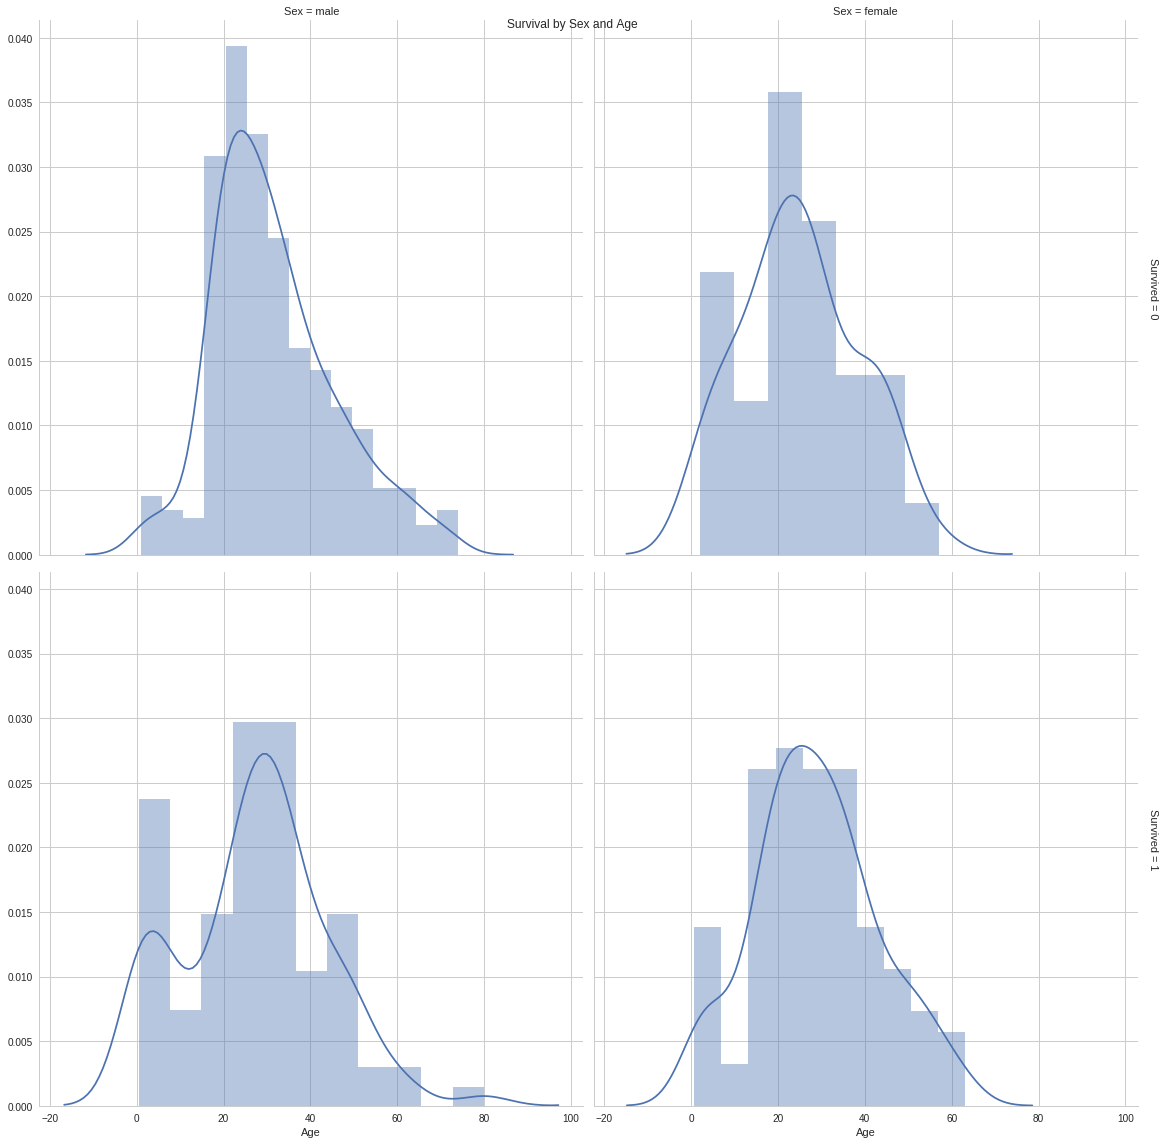

In [362]:
# Study of Age & Sex
g = sns.FacetGrid(df_train,col="Sex", row="Survived",margin_titles=True,size=8)
g.map(sns.distplot, "Age")
g.fig.suptitle('Survival by Sex and Age')

/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


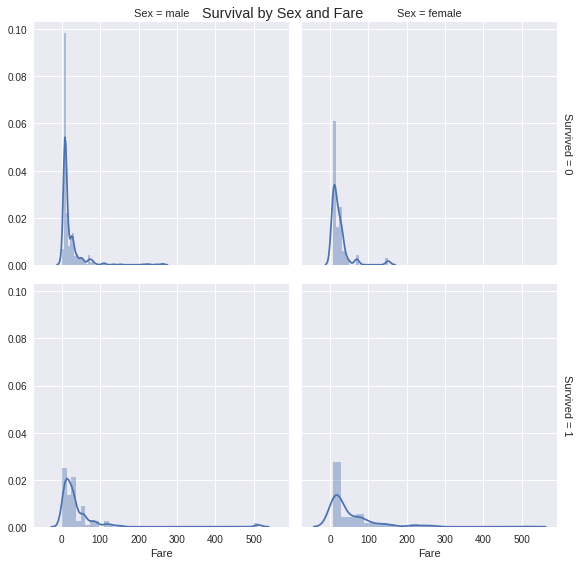

In [195]:
# Study of Fare & Sex
g = sns.FacetGrid(df_train, col="Sex", row="Survived", margin_titles=True,size=4)
g.map(sns.distplot, "Fare")
g.fig.suptitle('Survival by Sex and Fare')

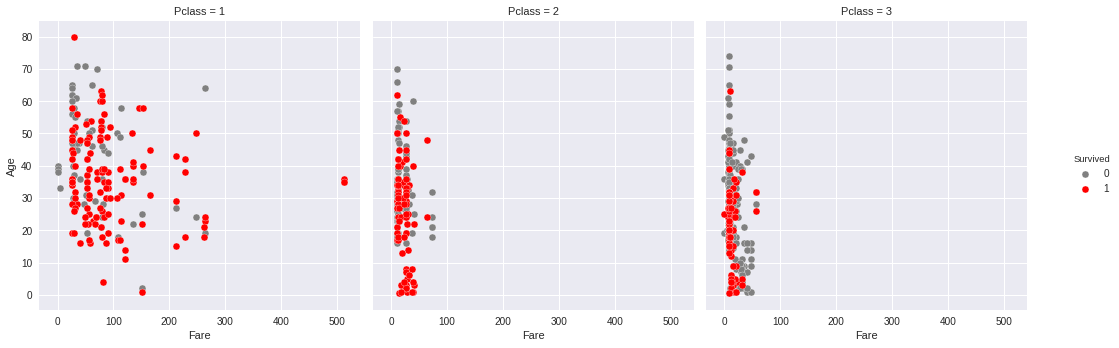

In [176]:
# Study of Fare, Pclass & Age
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"red", 0:"grey"},size=5)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()


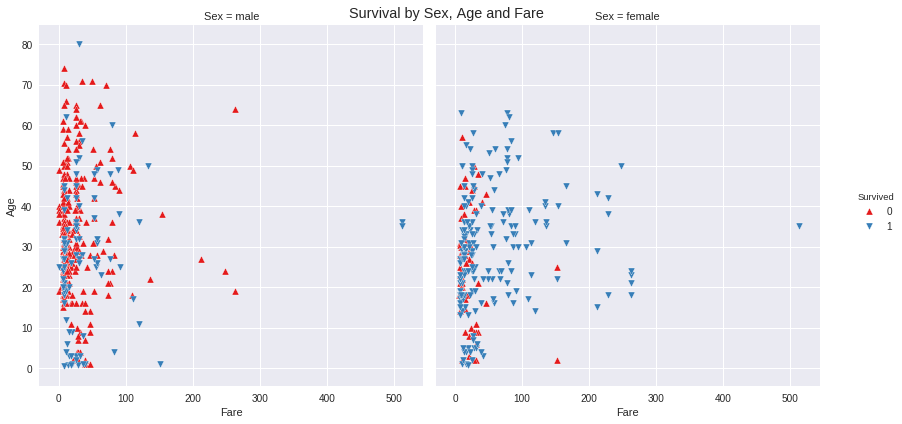

In [177]:
# Study of Fare, Sex & Age
g = sns.FacetGrid(df_train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]),size=6)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle('Survival by Sex, Age and Fare')

In [207]:
# Correlation with survived
# df_train.corr() # marche pas car survived est object

In [241]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Size_family', 'Number_of_relatives'],
      dtype='object')

### Missing Values

,Fare,Pclass,Embarked


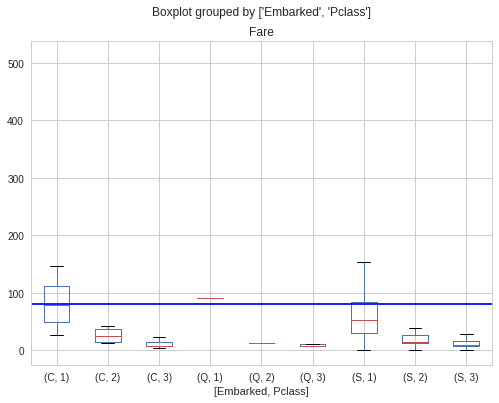

In [392]:
# Embarked

# Get the null rows where Embarked is null
display(df_train[df_train.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']])

# Embarked missing values
df_train.boxplot(column='Fare', by=['Embarked','Pclass'], figsize=(8,6))
plt.axhline(y=80, color='blue')

# Remplace null values by C because most people who is Pclass 1 and Fare 80 has Embarked from C
df_train = df_train.set_value(df_train.Embarked.isnull(), 'Embarked', 'C')

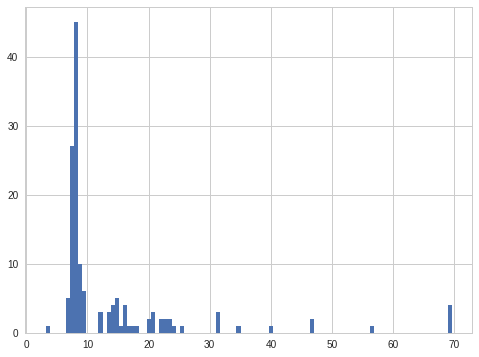

In [393]:
# Fare

# Visualization of the fare which is missing
df_test[df_test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
#df_test[(df_test.Pclass==3)&(df_test.Embarked=='S')].Fare.hist(bins=100)
df_test.loc[(df_test['Pclass']==3) & (df_test['Embarked']=='S')].Fare.hist(bins=100,figsize=(8,6))

# Get and affect the median to the missing value
Fare_median=df_test[(df_test.Pclass==3) & (df_test.Embarked=='S')].Fare.median()
#df_test = df_test.set_value(df_test.Fare.isnull(), 'Fare', Fare_median)
df_test["Fare"].fillna(Fare_median, inplace=True)

### Feature engineering

#### Name

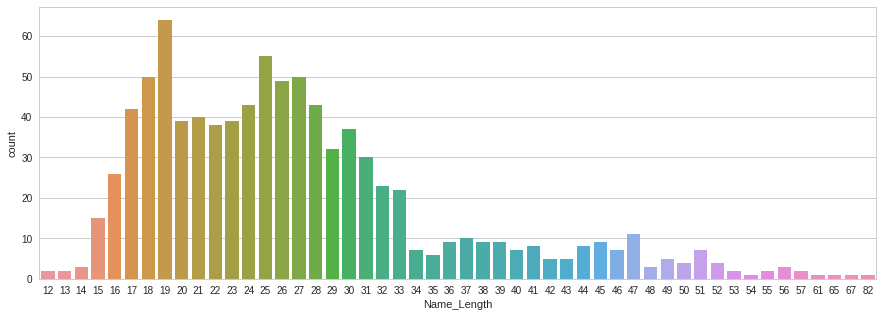

In [347]:
#Create feature for the length of name 
df_train["Name_Length"] = df_train["Name"].apply(lambda x: len(x))
df_test["Name_Length"] = df_test["Name"].apply(lambda x: len(x))

fig = plt.figure(figsize=(15, 5))
fig=sns.countplot(x='Name_Length', data=df_train)

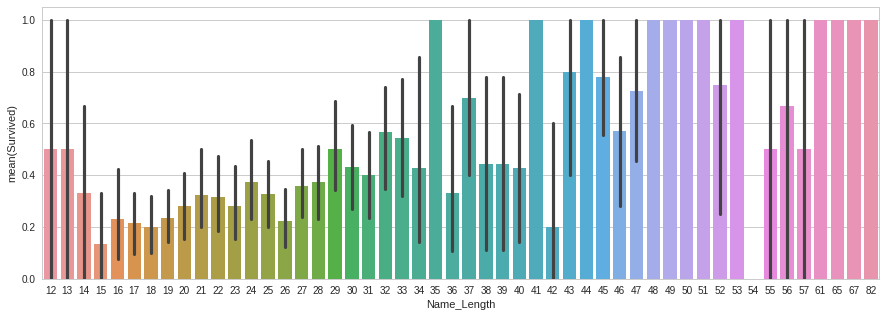

In [348]:
# Plot Name_Length by mean of survival
fig = plt.figure(figsize=(15, 5))
fig=sns.barplot(x='Name_Length', y='Survived', data=df_train)

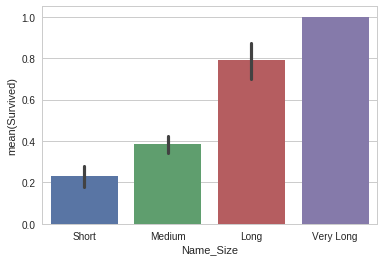

In [424]:
# Create a categorical feature Name_Size
df_train['Name_Size']=pd.cut(df_train['Name_Length']
                            ,bins=[0,20,40,60,90]
                            ,labels=["Short","Medium","Long","Very Long"])

df_test['Name_Size']=pd.cut(df_train['Name_Length']
                            ,bins=[0,20,40,60,90]
                            ,labels=["Short","Medium","Long","Very Long"])

sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"])

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Don               1
the Countess      1
Lady              1
Sir               1
Mme               1
Ms                1
Capt              1
dtype: int64

Title_aggr
Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
dtype: int64

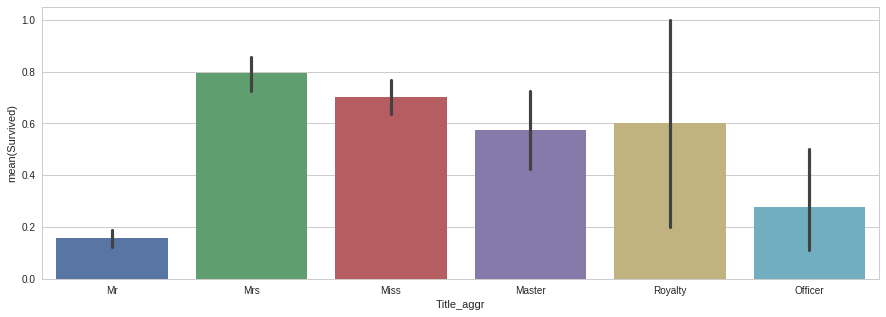

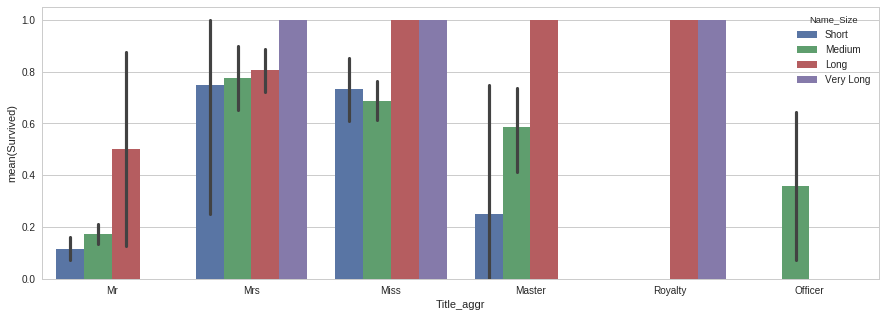

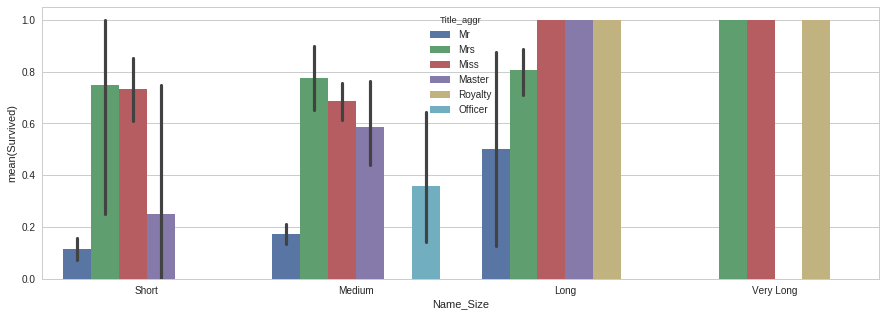

In [418]:
# Extract the title from each name
df_train['Title'] = df_train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
df_test['Title'] = df_train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# Display the title
Sort_Title=df_train.groupby('Title').size()
Sort_Title.sort_values(ascending=False,inplace=True)
display(Sort_Title)

# Map for aggregated titles
Title_Dictionary = {
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Master" :    "Master",
                    "Lady" :      "Royalty",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dona":       "Royalty",
                    "the Countess":"Royalty"
                    }
    
# Mapping
df_train['Title_aggr'] = df_train.Title.map(Title_Dictionary)
df_test['Title_aggr'] = df_test.Title.map(Title_Dictionary)

# Display aggregate title
Sort_Title_agg=df_train.groupby('Title_aggr').size()
Sort_Title_agg.sort_values(ascending=False,inplace=True)
display(Sort_Title_agg)

# Display aggregate title by survived probability
fig1 = plt.figure(figsize=(15, 5))
fig1=sns.barplot(x='Title_aggr',y='Survived', data=df_train)

# Display aggregate title and Name Size by survived probability
fig2 = plt.figure(figsize=(15, 5))
fig2=sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train)

# Display aggregate title and Name Size by survived probability
fig3 = plt.figure(figsize=(15, 5))
fig3=sns.barplot(x='Name_Size',y='Survived', hue='Title_aggr', data=df_train)

#### Convert Categorical variables into Numerical ones

In [426]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title_aggr","Size_Family","Name_Size"]
for col in cat_vars:
    df_train[col]=labelEnc.fit_transform(df_train[col])
    df_test[col]=labelEnc.fit_transform(df_test[col])

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Number_of_relatives,Size_Family,NameLength,Name_Length,Name_Size,Title,Title_aggr
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,1,2,23,23,1,Mr,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,1,2,51,51,0,Mrs,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,0,0,22,22,1,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,1,2,44,44,0,Mrs,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,0,0,24,24,1,Mr,2


### Age

In [406]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Number_of_relatives', 'Size_Family', 'NameLength',
       'Name_Length', 'Name_Size', 'Title', 'Title_aggr'],
      dtype='object')

In [ ]:
# Age --> a inferer avec un algo de ML
# Age seems to be promising feature. So it doesnt make sense to simply fill all the null values out with median/mean/mode.

# A ecrire soit meme a la fin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from pprint import pprint

from sklearn.metrics import mean_squared_error,median_absolute_error,mean_absolute_error,explained_variance_score,r2_score
#predicting missing values in age using Random Forest

#Feature set
age_df = df_train[['Age','Embarked','Fare', 'Parch', 'SibSp',
             'Number_of_relatives', 'Title_aggr','Pclass','Size_Family',
             'Name_Length',"Name_Size"]]
# Split sets into train and test
train_age  = age_df.loc[ (df_train.Age.notnull()) ]# known Age values
need_pred_age = age_df.loc[ (df_train.Age.isnull()) ]# null Ages

# All age values are stored in a target array
y = train_age.values[:, 0]

# All the other values are stored in the feature array
X = train_age.values[:, 1::]

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Use the fitted model to predict the missing values
#predictedAges = rtr.predict(test.values[:, 1::])

# Assign those predictions to the full data set
#df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

In [ ]:
# Simply fill the nan values with median using Pclass, Sex and Title

grouped = df_train.groupby(['Sex','Pclass','Title'])
grouped.median()

In [461]:
# RandomForestRegressor

# Parameters setup
param_grid1 = [
  {'n_estimators': [100,500,1000,5000], 
   'criterion': ['mse']}]

# Estimator setup
rtr = RandomForestRegressor()

# Gridsearch setup
gs = GridSearchCV(estimator=rtr, 
                  param_grid=param_grid1,
                  scoring='r2',
                  n_jobs=-1, 
                  cv=3, 
                  verbose=1, 
                  refit=True)

# Run gridearch
gs.fit(X_train, y_train)
y_test_pred=gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best r2 GS Score %.3f' % gs.best_score_)
print('Mean squarred error %.3f' % mean_squared_error(y_test,y_test_pred))
print('Median absolute error %.3f' % median_absolute_error(y_test,y_test_pred))
print('Mean absolute error %.3f' % mean_absolute_error(y_test,y_test_pred))
print('Explained variance score %.3f' % explained_variance_score(y_test,y_test_pred))
print('R2 score %.3f' % r2_score(y_test,y_test_pred))
r2_score
# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    1.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   13.7s finished


Best GS Params {'criterion': 'mse', 'n_estimators': 100}
Best r2 GS Score 0.310
Mean squarred error 119.150
Median absolute error 6.911
Mean absolute error 8.643
Explained variance score 0.360

Grid Score on training set
[mean: 0.31041, std: 0.07370, params: {'criterion': 'mse', 'n_estimators': 100},
 mean: 0.30780, std: 0.07105, params: {'criterion': 'mse', 'n_estimators': 500},
 mean: 0.30691, std: 0.06887, params: {'criterion': 'mse', 'n_estimators': 1000},
 mean: 0.30669, std: 0.07025, params: {'criterion': 'mse', 'n_estimators': 5000}]


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [462]:
# GaussianProcessRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

gpr = GaussianProcessRegressor()
param_grid2 = [
  {'n_estimators': [100,500,1000,5000], 
   'criterion': ['mse']}]

# Gridsearch setup
gs = GridSearchCV(estimator=gpr, 
                  param_grid=param_grid2,
                  scoring='r2',
                  n_jobs=-1, 
                  cv=3, 
                  verbose=1, 
                  refit=True)

# Run gridearch
gs.fit(X_train, y_train)
y_test_pred=gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best r2 GS Score %.3f' % gs.best_score_)
print('Mean squarred error %.3f' % mean_squared_error(y_test,y_test_pred))
print('Median absolute error %.3f' % median_absolute_error(y_test,y_test_pred))
print('Mean absolute error %.3f' % mean_absolute_error(y_test,y_test_pred))
print('Explained variance score %.3f' % explained_variance_score(y_test,y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.0s finished


Best GS Params {'criterion': 'mse', 'n_estimators': 500}
Best r2 GS Score 0.167
Mean squarred error 144.382
Median absolute error 8.014
Mean absolute error 9.291
Explained variance score 0.224

Grid Score on training set
[mean: 0.16374, std: 0.04075, params: {'criterion': 'mse', 'n_estimators': 100},
 mean: 0.16665, std: 0.03477, params: {'criterion': 'mse', 'n_estimators': 500},
 mean: 0.16417, std: 0.03774, params: {'criterion': 'mse', 'n_estimators': 1000},
 mean: 0.16609, std: 0.03506, params: {'criterion': 'mse', 'n_estimators': 5000}]


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [ ]:
# GradientBoostingRegressor

gbr = GradientBoostingRegressor()
param_grid3 = [
  {'n_estimators': [5,10,30,100,250,500,1000,2000], 
   'criterion': ['friedman_mse'],
   'learning_rate': [0.01,0.03,0.05,0.1,0.2,0.3,0.4],
   'loss': ['ls','lad']
  }]

# Gridsearch setup
gs = GridSearchCV(estimator=gbr, 
                  param_grid=param_grid3,
                  scoring='r2',
                  n_jobs=-1, 
                  cv=3, 
                  verbose=1, 
                  refit=True)

# Run gridearch
gs.fit(X_train, y_train)
y_test_pred=gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best r2 GS Score %.3f' % gs.best_score_)
print('Mean squarred error %.3f' % mean_squared_error(y_test,y_test_pred))
print('Median absolute error %.3f' % median_absolute_error(y_test,y_test_pred))
print('Mean absolute error %.3f' % mean_absolute_error(y_test,y_test_pred))
print('Explained variance score %.3f' % explained_variance_score(y_test,y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

In [ ]:
# SVR
from sklearn.svm import SVR

svr = SVR()
param_grid4 = [
  {'C': [0.1,0.3,1,3,10,30,100,300], 
   'kernel': ['rbf','poly','sigmoid','linear'],
   'epsilon': [0.05,0.1,0.25,0.5,0.75,0.90]
  }]

# Gridsearch setup
gs = GridSearchCV(estimator=svr, 
                  param_grid=param_grid4,
                  scoring='r2',
                  n_jobs=-1, 
                  cv=3, 
                  verbose=1, 
                  refit=True)

# Run gridearch
gs.fit(X_train, y_train)
y_test_pred=gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best r2 GS Score %.3f' % gs.best_score_)
print('Mean squarred error %.3f' % mean_squared_error(y_test,y_test_pred))
print('Median absolute error %.3f' % median_absolute_error(y_test,y_test_pred))
print('Mean absolute error %.3f' % mean_absolute_error(y_test,y_test_pred))
print('Explained variance score %.3f' % explained_variance_score(y_test,y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.datasets import load_iris

from pprint import pprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Classifieur setup
cls = SVC(C=10.0, 
          kernel='rbf', 
          gamma=0.1, 
          decision_function_shape='ovr')

# Pipeline setup
kernel_svm = Pipeline([('std', StandardScaler()), 
                       ('svc', cls)])

# Parameters setup
param_grid = [
  {'svc__C': [1, 10, 100, 1000], 
   'svc__gamma': [0.001, 0.0001], 
   'svc__kernel': ['rbf']},
 ]

# Gridsearch setup
gs = GridSearchCV(estimator=kernel_svm, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=-1, 
                  cv=5, 
                  verbose=1, 
                  refit=True,
                  pre_dispatch='2*n_jobs')

# Run gridearch
gs.fit(X_train, y_train)

# Prediction
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

# Results
print('Best GS Params %s' % gs.best_params_)
print('Best GS Score %.3f' % gs.best_score_)

# Prediction on the training set
train_acc = (y_train == y_train_pred).sum()/len(y_train)
print('\nTrain Accuracy: %.3f' % (train_acc))

# Evaluation on the test set
test_acc = (y_test == y_test_pred).sum()/len(y_test)
print('\nTest Accuracy: %.3f' % (test_acc))

# Classification Reports
print('\nClassification report on training set')
print(classification_report(y_train, y_train_pred))
print('\nClassification report on testing set')
print(classification_report(y_test, y_test_pred))

# Grid Score Report
print('\nGrid Score on training set')
pprint(gs.grid_scores_)

In [ ]:
# Age --> a inferer avec un algo de ML
# Age seems to be promising feature. So it doesnt make sense to simply fill all the null values out with median/mean/mode.

# A ecrire soit meme a la fin

from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FsizeD','NameLength',"NlengthD",'Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

### Feature Scalling

In [ ]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df_train[['Age', 'Fare']])
df_train = std_scale.transform(df_train[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(df_test[['Age', 'Fare']])
df_test = std_scale.transform(df_test[['Age', 'Fare']])

### Feature selection

### Model Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris

from pprint import pprint
import pandas as pd
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Plot the confusion matrice 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Grid Score into a Pandas Dataframe
def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params.
    """
    df=pd.DataFrame.from_dict(cv_results)
    df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df

# Helper function for gridseach
def grid_search_global(clas_reg, dict_pip, dict_param, class_names):

    dict_of_res={}
    dict_of_best={}
    df_results_global=pd.DataFrame()
    
    print ("Starting Gridsearch")
    
    for key in dict_param.keys():
        gs = GridSearchCV(dict_pip[key], dict_param[key], verbose=0, refit=True, n_jobs=-1, cv=5)
        gs = gs.fit(X_train, y_train)
        dict_of_res[key]=gs.grid_scores_
        
        print('\n-------------------------------------------------------------------------------------------------------')
        print ("Gridsearch for %s \n" % dict_param[key])
        print ("Best score :", gs.best_score_)
        print ("Best params :",gs.best_params_)
        dict_of_best[key]=[gs.best_score_,gs.best_params_]
        
        y_train_pred=gs.predict(X_train)
        y_test_pred=gs.predict(X_test)
        
        if (clas_reg=='clas'):
            
            # Classification report
            print('\nClassification report on training set')
            print(classification_report(y_train, y_train_pred))
            print('\nClassification report on testing set')
            print(classification_report(y_test, y_test_pred))
            
            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_test_pred)
            np.set_printoptions(precision=2)

            # Plot non-normalized confusion matrix
            #plt.figure()
            #plot_confusion_matrix(cnf_matrix, classes=class_names,
            #                      title='Confusion matrix, without normalization')
            
            # Plot normalized confusion matrix
            plt.figure()
            plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                                  title='Normalized confusion matrix')
            
            plt.show()
        
        # Resultats deja présent dans : Grid Score #cv_results_ alégé
        #print('\nGrid Score #grid_scores_')
        #pprint(gs.grid_scores_)
        
        # Obtention des résultats avec selection et réarrangement des attributs puis stockage
        df_results=cv_results_to_df(gs.cv_results_)
        df_results['Algo']=key
        df_results=df_results[['Algo','mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
        df_results_global=df_results_global.append(df_results)
        print("\nGrid Score #cv_results_ alégé")
        display(df_results)
        

        
    # Transformation de dict_of_best en dataframe
    df_best=pd.DataFrame.from_dict(dict_of_best,'index')
    df_best.columns=['Scores','Parameters']
    df_best.sort_values('Scores',ascending=False,inplace=True)  

    print('\n -------------------------------------------------------------------------------------------------------')
    print('\nList of best score and parameters by pipeline')
    display(df_best)
    print('\nSummary')
    display(df_results_global)
    print ("Gridsearch Finished")
    print('\n -------------------------------------------------------------------------------------------------------')    
    return df_best, dict_of_best, df_results_global   

In [ ]:
# Data
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Pipeline setup
models = { 
    'ExtraTreesClassifier': Pipeline([('std', StandardScaler()), ('ExtraTreesClassifier', ExtraTreesClassifier())]),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

# Parameters setup
params = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'ExtraTreesClassifier': { 'ExtraTreesClassifier__n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'RandomForestClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'AdaBoostClassifier':  { 'n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'GradientBoostingClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names)